<a href="https://colab.research.google.com/github/vinhhccode/UCTVex-and-DEA/blob/main/X%E1%BB%AD_l%C3%AD_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vnstock

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
pip install pandas pmdarima statsmodels matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.0 MB/s eta 0:00:00


In [ ]:
!pip install -U vnstock

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 14.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
from vnstock import Vnstock

In [ ]:
pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.3 MB/s eta 0:00:00


# XỬ LÍ DỮ LIỆU 5 NGUỒN TIN TỨC

In [ ]:
import pandas as pd

# 1. Đọc sheet đầu tiên trong file
file_path = 'UCTV 2014-2023.xlsx'
xls = pd.ExcelFile(file_path)
sheet1 = xls.sheet_names[0]
df = pd.read_excel(file_path, sheet_name=sheet1)

# 2. Định nghĩa các cột gốc và tên cột chuẩn hóa
cols_original = [
    'doanh nhân sài gòn',
    'kinh tế đô thị',
    'báo đầu tư',
    'vneconomy',
    'tạp chí tài chính'
]
cols_new = [
    'Tạp chí Doanh nhân sài gòn_UCT_Index',
    'Báo Kinh tế đô thị_UCT_Index',
    'Báo đầu tư_UCT_Index',
    'Tạp chí Kinh Tế Việt Nam_UCT_Index',
    'Tạp chí Tài chính_UCT_Index'
]

# 3. Tính mean của từng cột gốc
means = df[cols_original].mean()

# 4. Tạo DataFrame chuẩn hóa (sheet thứ 2)
df_std = df.copy()
for orig, new in zip(cols_original, cols_new):
    df_std[new] = df[orig] / means[orig] * 100

# Giữ lại chỉ cột month + 5 cột mới
df_std = df_std[['month'] + cols_new]

# 5. Tạo DataFrame tính hai loại mean (sheet thứ 3) và thêm cột thời gian 'month'
# Mean_Normal: trung bình đơn giản của 5 cột chuẩn hóa
# Mean_Weighted: trung bình có trọng số theo số bài (giả sử đã có 5 cột total_count_* tương ứng)
cols_count = [
    'total_count_doanh nhân sài gòn',
    'total_count_kinh tế đô thị',
    'total_count_báo đầu tư',
    'total_count_vneconomy',
    'total_count_tạp chí tài chính'
]

# Khởi tạo df_means với cột month
df_means = pd.DataFrame({'month': df['month']})

# Trung bình đơn giản
df_means['Mean_Normal'] = df_std[cols_new].mean(axis=1)

# Trung bình có trọng số
weighted_sum = sum(df_std[new] * df[count]
                   for new, count in zip(cols_new, cols_count))
total_weights = df[cols_count].sum(axis=1)
df_means['Mean_Weighted'] = weighted_sum / total_weights

# 6. Ghi ra file Excel mới với 3 sheet:
#    - sheet1: giữ nguyên dữ liệu gốc
#    - sheet2: Standardized indices
#    - sheet3: Means (có thêm cột month)
output_path = 'UCTV 2014-2023 mới.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    # Sheet 1: copy nguyên bản
    df.to_excel(writer, sheet_name=sheet1, index=False)
    # Sheet 2: chuẩn hóa
    df_std.to_excel(writer, sheet_name='Standardized indices', index=False)
    # Sheet 3: hai cột mean và cột month
    df_means.to_excel(writer, sheet_name='Means', index=False)

print(f"Đã lưu kết quả vào: {output_path}")


Đã lưu kết quả vào: UCTV 2014-2023 mới.xlsx


# Cronbach's Alpha

In [ ]:
import pandas as pd
import pingouin as pg

# Đọc file Excel và chọn sheet thứ 2
tab_name = pd.ExcelFile('UCTV 2014-2023 mới.xlsx').sheet_names[1]  # Lấy tên sheet thứ 2
df = pd.read_excel('UCTV 2014-2023 mới.xlsx', sheet_name=tab_name)

# Chọn các cột cần phân tích
target_columns = ['kinh tế đô thị_UCT_Index', 'báo đầu tư_UCT_Index',
                  'vneconomy_UCT_Index', 'tạp chí tài chính_UCT_Index',
                  'doanh nhân sài gòn_UCT_Index']
data = df[target_columns]

# Tính Cronbach's Alpha toàn bộ
alpha, ci = pg.cronbach_alpha(data)

# Tính phương sai từng mục
item_vars = data.var(ddof=1)

# Tính Cronbach's Alpha nếu loại bỏ từng mục
alpha_if_deleted = []
for col in target_columns:
    reduced_data = data.drop(columns=col)
    alpha_del, _ = pg.cronbach_alpha(reduced_data)
    alpha_if_deleted.append(alpha_del)

# Tạo bảng kết quả
results_table = pd.DataFrame({
    'Mục': target_columns,
    'Phương sai (Item Variance)': item_vars.values,
    'Alpha nếu loại bỏ (Alpha if Deleted)': alpha_if_deleted
})

# Thêm dòng tổng kết
summary_row = pd.DataFrame({
    'Mục': ['Tổng kết'],
    'Phương sai (Item Variance)': [data.sum(axis=1).var(ddof=1)],
    'Alpha nếu loại bỏ (Alpha if Deleted)': [alpha]
})
results_table = pd.concat([results_table, summary_row], ignore_index=True)

# In kết quả chính
print(f"Cronbach's Alpha: {alpha:.3f}")
print(f"95% Confidence Interval: ({ci[0]:.3f}, {ci[1]:.3f})")
# In bảng kết quả
print("\nBảng kết quả Cronbach's Alpha và các thông số liên quan:")
print(results_table.to_string(index=False, float_format='%.3f'))


Cronbach's Alpha: 0.874
95% Confidence Interval: (0.835, 0.907)

Bảng kết quả Cronbach's Alpha và các thông số liên quan:
                         Mục  Phương sai (Item Variance)  Alpha nếu loại bỏ (Alpha if Deleted)
    kinh tế đô thị_UCT_Index                    3747.761                                 0.825
        báo đầu tư_UCT_Index                    3575.763                                 0.869
         vneconomy_UCT_Index                    2526.020                                 0.801
 tạp chí tài chính_UCT_Index                    2472.859                                 0.824
doanh nhân sài gòn_UCT_Index                    1786.019                                 0.902
                    Tổng kết                   46961.357                                 0.874


In [ ]:

# Đọc file Excel và chọn sheet thứ 2
tab_name = pd.ExcelFile('UCTV 2014-2023 mới.xlsx').sheet_names[1]  # Lấy tên sheet thứ 2
df = pd.read_excel('UCTV 2014-2023 mới.xlsx', sheet_name=tab_name)

# Chọn 5 cột chứa chỉ số căng thẳng từ các trang báo (giả sử 5 cột đầu tiên sau cột đầu tiên)
data = df.iloc[:, 1:].iloc[:, :5]  # 5 cột đầu chứa dữ liệu cần phân tích

# Hàm tính Cronbach's Alpha và các thông số liên quan
def cronbach_alpha_detailed(df):
    # Chuyển dữ liệu thành numpy array
    itemscores = df.values

    # Số lượng mục (items)
    n_items = df.shape[1]

    # Tính phương sai của từng mục (item variances)
    item_vars = itemscores.var(axis=0, ddof=1)

    # Tính phương sai tổng của tổng điểm các mục (total variance)
    total_scores = itemscores.sum(axis=1)
    total_var = total_scores.var(ddof=1)

    # Tính Cronbach's Alpha
    alpha = (n_items / (n_items - 1)) * (1 - sum(item_vars) / total_var)

    # Tính hệ số tương quan giữa các mục (inter-item correlations)
    inter_item_corr = df.corr()
    avg_inter_item_corr = inter_item_corr.values[np.triu_indices_from(inter_item_corr, k=1)].mean()

    # Tính độ tin cậy nếu loại bỏ từng mục (Alpha if item deleted)
    alpha_if_deleted = []
    for i in range(n_items):
        # Loại bỏ mục thứ i
        reduced_data = np.delete(itemscores, i, axis=1)
        reduced_vars = reduced_data.var(axis=0, ddof=1)
        reduced_total_var = reduced_data.sum(axis=1).var(ddof=1)
        reduced_alpha = ((n_items - 1) / (n_items - 2)) * (1 - sum(reduced_vars) / reduced_total_var)
        alpha_if_deleted.append(reduced_alpha)

    return {
        'Cronbach Alpha': alpha,
        'Item Variances': item_vars,
        'Total Variance': total_var,
        'Average Inter-Item Correlation': avg_inter_item_corr,
        'Alpha if Item Deleted': alpha_if_deleted
    }

# Tính toán Cronbach's Alpha và các thông số liên quan
results = cronbach_alpha_detailed(data)

# In kết quả
print(f"Cronbach's Alpha: {results['Cronbach Alpha']:.3f}")
print("\nPhương sai của từng mục (Item Variances):")
for i, var in enumerate(results['Item Variances']):
    print(f"Mục {i+1}: {var:.3f}")
print(f"\nPhương sai tổng (Total Variance): {results['Total Variance']:.3f}")
print(f"\nHệ số tương quan trung bình giữa các mục (Average Inter-Item Correlation): {results['Average Inter-Item Correlation']:.3f}")
print("\nCronbach's Alpha nếu loại bỏ từng mục (Alpha if Item Deleted):")
for i, alpha in enumerate(results['Alpha if Item Deleted']):
    print(f"Loại bỏ mục {i+1}: {alpha:.3f}")

# Tạo bảng kết quả
results_table = pd.DataFrame({
    'Mục': [f'Mục {i+1}' for i in range(5)],
    'Phương sai (Item Variance)': results['Item Variances'],
    'Alpha nếu loại bỏ (Alpha if Deleted)': results['Alpha if Item Deleted']
})

# Thêm dòng tổng kết cho Cronbach's Alpha và các thông số khác
summary_row = pd.DataFrame({
    'Mục': ['Tổng kết'],
    'Phương sai (Item Variance)': [results['Total Variance']],
    'Alpha nếu loại bỏ (Alpha if Deleted)': [results['Cronbach Alpha']]
})

# Kết hợp bảng chính và dòng tổng kết
results_table = pd.concat([results_table, summary_row], ignore_index=True)

# Định dạng bảng
print("\nBảng kết quả Cronbach's Alpha và các thông số liên quan:")
print(results_table.to_string(index=False, float_format='%.3f'))

# In thêm thông tin hệ số tương quan trung bình
print(f"\nHệ số tương quan trung bình giữa các mục: {results['Average Inter-Item Correlation']:.3f}")

Cronbach's Alpha: 0.874

Phương sai của từng mục (Item Variances):
Mục 1: 3747.761
Mục 2: 3575.763
Mục 3: 2526.020
Mục 4: 2472.859
Mục 5: 1786.019

Phương sai tổng (Total Variance): 46961.357

Hệ số tương quan trung bình giữa các mục (Average Inter-Item Correlation): 0.582

Cronbach's Alpha nếu loại bỏ từng mục (Alpha if Item Deleted):
Loại bỏ mục 1: 0.825
Loại bỏ mục 2: 0.869
Loại bỏ mục 3: 0.801
Loại bỏ mục 4: 0.824
Loại bỏ mục 5: 0.902

Bảng kết quả Cronbach's Alpha và các thông số liên quan:
     Mục  Phương sai (Item Variance)  Alpha nếu loại bỏ (Alpha if Deleted)
   Mục 1                    3747.761                                 0.825
   Mục 2                    3575.763                                 0.869
   Mục 3                    2526.020                                 0.801
   Mục 4                    2472.859                                 0.824
   Mục 5                    1786.019                                 0.902
Tổng kết                   46961.357             

# VẼ UCTV, UCTV -UCT, UCTV-GPR-GEPU

Tương quan Pearson giữa GEPU (chuẩn hóa) và UCTV: 0.4552, p-value: 0.0000
Tương quan Pearson giữa GPR (chuẩn hóa) và UCTV: -0.0235, p-value: 0.7986
Tương quan Pearson giữa GEPU (chuẩn hóa) và GPR (chuẩn hóa): 0.0229, p-value: 0.8038


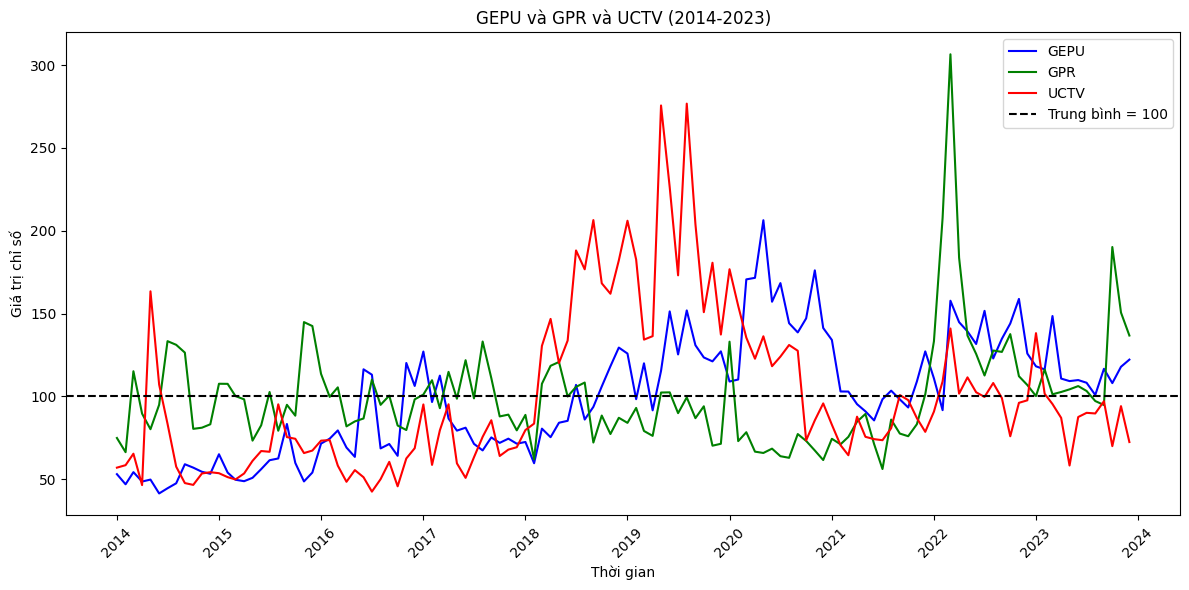

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Đọc dữ liệu từ các file
gepu_gpr_df = pd.read_excel('GEPUandGPR.xlsx', parse_dates=['month'])  # File GEPUandGPR
mean_weighted_df = pd.read_excel('UCTV 2014-2023 mới.xlsx', sheet_name=2, parse_dates=['month'])  # File chứa Mean_Weighted

# Lọc dữ liệu trong khoảng từ 01/01/2014 đến 31/12/2024
gepu_gpr_df = gepu_gpr_df[(gepu_gpr_df['month'] >= '2014-01-01') & (gepu_gpr_df['month'] <= '2023-12-31')]
mean_weighted_df = mean_weighted_df[(mean_weighted_df['month'] >= '2014-01-01') & (mean_weighted_df['month'] <= '2023-12-31')]

# Chuẩn hóa dữ liệu GEPU và GPR về trung bình 100
gepu_mean = gepu_gpr_df['GEPU'].mean()
gpr_mean = gepu_gpr_df['GPR'].mean()
gepu_gpr_df['GEPU_normalized'] = (gepu_gpr_df['GEPU'] / gepu_mean) * 100
gepu_gpr_df['GPR_normalized'] = (gepu_gpr_df['GPR'] / gpr_mean) * 100

# Căn chỉnh dữ liệu để tính tương quan (giữ các thời điểm chung)
merged_df = pd.merge(gepu_gpr_df[['month', 'GEPU_normalized', 'GPR_normalized']],
                     mean_weighted_df[['month', 'Mean_Weighted']],
                     on='month', how='inner')

# Tính tương quan Pearson
corr_gepu_mean, p_gepu_mean = pearsonr(merged_df['GEPU_normalized'], merged_df['Mean_Weighted'])
corr_gpr_mean, p_gpr_mean = pearsonr(merged_df['GPR_normalized'], merged_df['Mean_Weighted'])
corr_gepu_gpr, p_gepu_gpr = pearsonr(merged_df['GEPU_normalized'], merged_df['GPR_normalized'])

# In kết quả tương quan
print(f"Tương quan Pearson giữa GEPU (chuẩn hóa) và UCTV: {corr_gepu_mean:.4f}, p-value: {p_gepu_mean:.4f}")
print(f"Tương quan Pearson giữa GPR (chuẩn hóa) và UCTV: {corr_gpr_mean:.4f}, p-value: {p_gpr_mean:.4f}")
print(f"Tương quan Pearson giữa GEPU (chuẩn hóa) và GPR (chuẩn hóa): {corr_gepu_gpr:.4f}, p-value: {p_gepu_gpr:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(gepu_gpr_df['month'], gepu_gpr_df['GEPU_normalized'], color='blue', label='GEPU')
plt.plot(gepu_gpr_df['month'], gepu_gpr_df['GPR_normalized'], color='green', label='GPR')
plt.plot(mean_weighted_df['month'], mean_weighted_df['Mean_Weighted'], color='red', label='UCTV')
plt.axhline(y=100, color='black', linestyle='--', label='Trung bình = 100')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị chỉ số')
plt.title('GEPU và GPR và UCTV (2014-2023)')
plt.legend()

# Định dạng trục x để chỉ hiển thị năm
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Điều chỉnh bố cục và hiển thị biểu đồ
plt.tight_layout()
plt.show()

Hệ số tương quan Pearson: 0.5389
Giá trị p-value: 0.0000


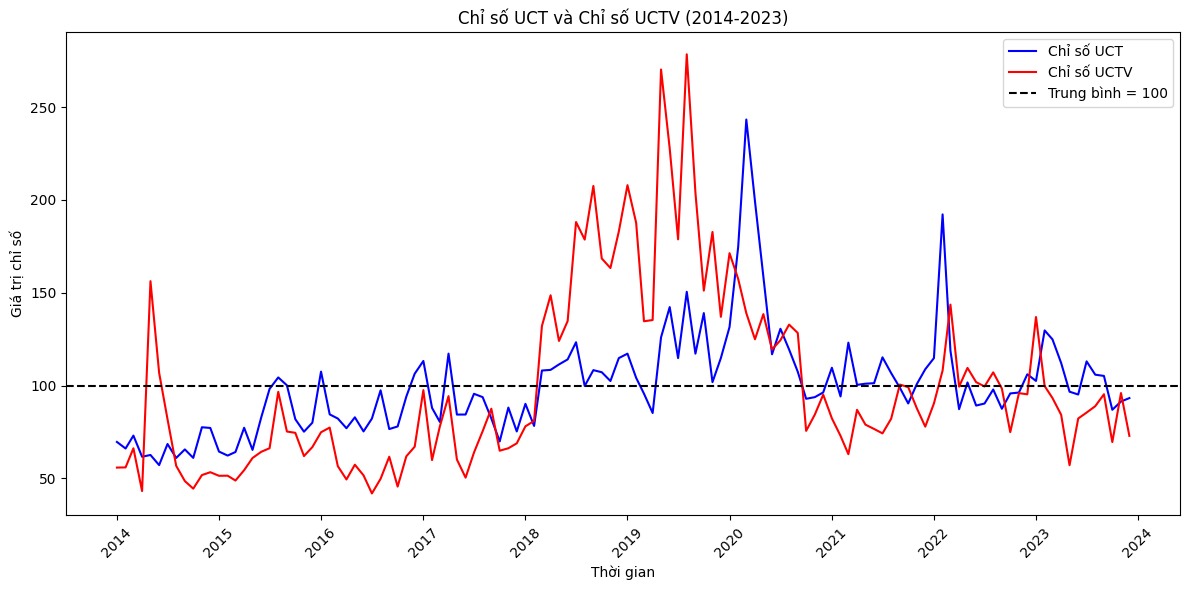

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Đọc dữ liệu từ file CSV và Excel
uct_df = pd.read_csv('UCT.csv')
mean_weighted_df = pd.read_excel('UCTV 2014-2023 mới.xlsx', sheet_name=2, parse_dates=['month'])

# Chuyển đổi cột 'date' trong uct_df từ '2014m1' thành định dạng datetime
uct_df['date'] = uct_df['date'].str.replace('m', '-')
uct_df['date'] = pd.to_datetime(uct_df['date'] + '-01', format='%Y-%m-%d')

# Lọc dữ liệu trong khoảng từ 01/01/2014 đến 31/12/2024
uct_df = uct_df[(uct_df['date'] >= '2014-01-01') & (uct_df['date'] <= '2023-12-31')]
mean_weighted_df = mean_weighted_df[(mean_weighted_df['month'] >= '2014-01-01') & (mean_weighted_df['month'] <= '2023-12-31')]

# Chuẩn hóa dữ liệu UCT về trung bình 100
uct_mean = uct_df['UCT'].mean()  # Tính trung bình của UCT
uct_df['UCT_normalized'] = (uct_df['UCT'] / uct_mean) * 100  # Chuẩn hóa về trung bình 100

# Căn chỉnh dữ liệu để tính tương quan (giữ các thời điểm chung)
merged_df = pd.merge(uct_df[['date', 'UCT_normalized']], mean_weighted_df[['month', 'Mean_Weighted']],
                     left_on='date', right_on='month', how='inner')

# Tính tương quan Pearson
correlation, p_value = pearsonr(merged_df['UCT_normalized'], merged_df['Mean_Weighted'])
print(f"Hệ số tương quan Pearson: {correlation:.4f}")
print(f"Giá trị p-value: {p_value:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(uct_df['date'], uct_df['UCT_normalized'], color='blue', label='Chỉ số UCT')
plt.plot(mean_weighted_df['month'], mean_weighted_df['Mean_Weighted'], color='red', label='Chỉ số UCTV')
plt.axhline(y=100, color='black', linestyle='--', label='Trung bình = 100')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị chỉ số')
plt.title('Chỉ số UCT và Chỉ số UCTV (2014-2023)')
plt.legend()


# Định dạng trục x để chỉ hiển thị năm
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Điều chỉnh bố cục và hiển thị biểu đồ
plt.tight_layout()
plt.show()

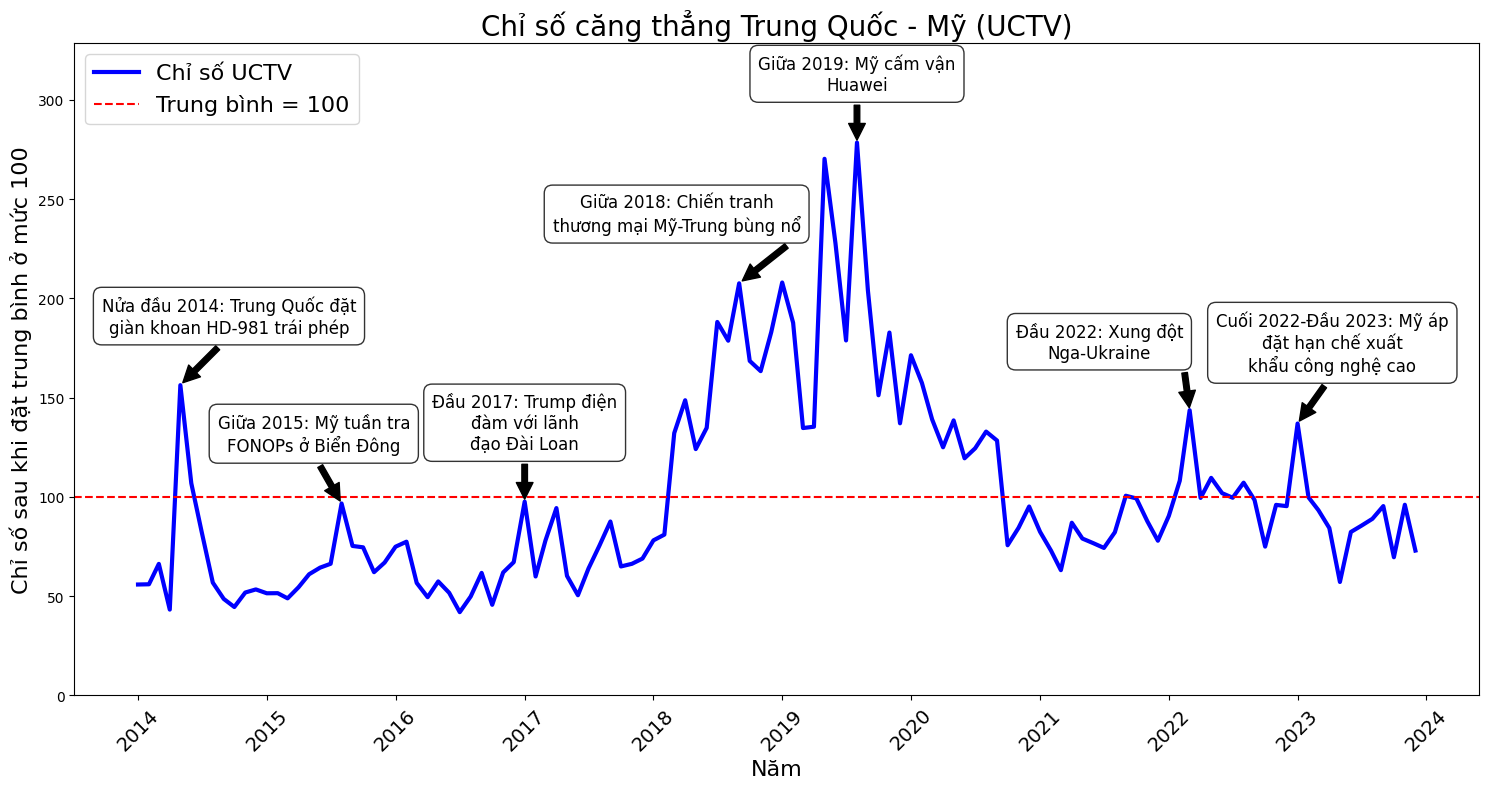

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 1. Đặt font hỗ trợ tiếng Việt
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# 2. Đọc dữ liệu từ file Excel, tab thứ 3
file_path = 'UCTV 2014-2023 mới.xlsx'
df = pd.read_excel(file_path, sheet_name=2)

# 3. Lọc dữ liệu cần thiết
mean_data = df[['month', 'Mean_Weighted']].copy()
mean_data['month'] = pd.to_datetime(mean_data['month'])

# 4. Xác định các sự kiện
events = [
    {"date": "2014-05-01", "label": "Nửa đầu 2014: Trung Quốc đặt\ngiàn khoan HD-981 trái phép"},
    {"date": "2015-10-27", "label": "Giữa 2015: Mỹ tuần tra\nFONOPs ở Biển Đông"},
    {"date": "2016-12-02", "label": "Đầu 2017: Trump điện\nđàm với lãnh\nđạo Đài Loan"},
    {"date": "2018-07-06", "label": "Giữa 2018: Chiến tranh\nthương mại Mỹ-Trung bùng nổ"},
    {"date": "2019-05-20", "label": "Giữa 2019: Mỹ cấm vận\nHuawei"},
    {"date": "2022-02-01", "label": "Đầu 2022: Xung đột\nNga-Ukraine"},
    {"date": "2023-02-06", "label": "Cuối 2022-Đầu 2023: Mỹ áp\nđặt hạn chế xuất\nkhẩu công nghệ cao"}
]

for event in events:
    event['date'] = pd.to_datetime(event['date'])
    window_start = event['date'] - pd.Timedelta(days=120)
    window_end = event['date'] + pd.Timedelta(days=120)
    window_data = mean_data[(mean_data['month'] >= window_start) & (mean_data['month'] <= window_end)]
    if not window_data.empty:
        peak = window_data.loc[window_data['Mean_Weighted'].idxmax()]
        event['peak_date'] = peak['month']
        event['peak_value'] = peak['Mean_Weighted']
    else:
        event['peak_date'] = event['date']
        event['peak_value'] = mean_data[mean_data['month'] == event['date']]['Mean_Weighted'].values[0]

# 5. Vẽ biểu đồ
plt.figure(figsize=(15, 8))
plt.plot(mean_data['month'], mean_data['Mean_Weighted'], label='Chỉ số UCTV', linewidth=3, color='blue')

dx = [35, -20, 0, -45, 0, -65, 25]
for i, event in enumerate(events):
    plt.annotate(event['label'],
                 xy=(event['peak_date'], event['peak_value']),
                 xytext=(dx[i], 35),  # Điều chỉnh khoảng cách dọc lớn hơn
                 textcoords='offset points',
                 fontsize=12,  # Tăng kích thước chữ sự kiện
                 color='black',
                 ha='center',
                 va='bottom',
                 multialignment='center',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 bbox=dict(boxstyle="round,pad=0.5", edgecolor='black', facecolor='white', alpha=0.8))

# 6. Tùy chỉnh biểu đồ
plt.title("Chỉ số căng thẳng Trung Quốc - Mỹ (UCTV)", fontsize=20)  # Tăng kích thước tiêu đề
plt.xlabel("Năm", fontsize=16)  # Tăng kích thước chữ trục X
plt.ylabel("Chỉ số sau khi đặt trung bình ở mức 100", fontsize=16)  # Tăng kích thước chữ trục Y
plt.axhline(y=100, color='red', linestyle='--', label='Trung bình = 100')
plt.legend(loc='upper left', fontsize=16)  # Tăng kích thước chữ chú thích

# Đặt ticks trên trục x là mỗi năm
years = pd.date_range(start='2014-01-01', end='2024-01-01', freq='YS')
plt.xticks(years, [year.strftime('%Y') for year in years], rotation=45, fontsize=14)  # Tăng kích thước chữ ticks

# Giới hạn trục y
max_value = mean_data['Mean_Weighted'].max()
plt.ylim(0, max_value + 50)

plt.tight_layout()
plt.show()


# TƯƠNG QUAN PEARSON


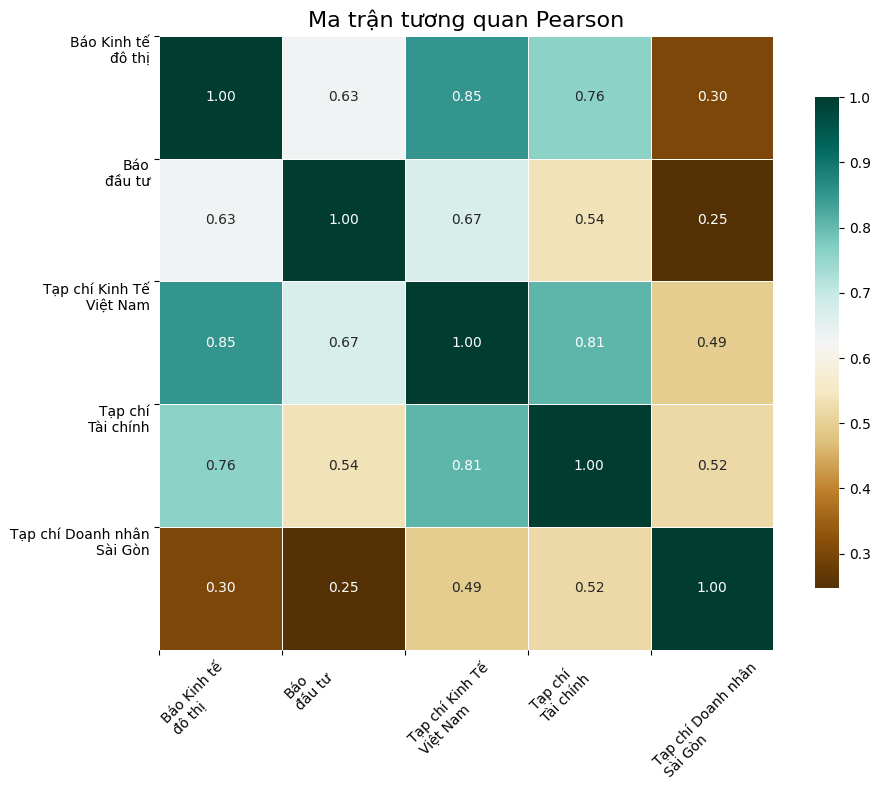

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc sheet thứ 2 trong file
file_path = 'UCTV 2014-2023 mới.xlsx'
sheet_name = pd.ExcelFile(file_path).sheet_names[1]
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Chọn các cột để phân tích
target_columns = ['Báo Kinh tế đô thị_UCT_Index', 'Báo đầu tư_UCT_Index',
                  'Tạp chí Kinh Tế Việt Nam_UCT_Index', 'Tạp chí Tài chính_UCT_Index',
                  'Tạp chí Doanh nhân sài gòn_UCT_Index']
data = df[target_columns]


# Tạo danh sách nhãn mới với ký tự xuống dòng
new_labels = ['Báo Kinh tế\nđô thị', 'Báo\nđầu tư',
              'Tạp chí Kinh Tế\nViệt Nam', 'Tạp chí\nTài chính',
              'Tạp chí Doanh nhân\nSài Gòn']

# Tính ma trận tương quan Pearson
corr_matrix = data.corr(method='pearson')
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="BrBG", square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')
plt.title("Ma trận tương quan Pearson", fontsize=16)

# Thiết lập nhãn cho trục x và y
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45,
           ha='left', va='top')  # Dịch sang phải (ha='right'), điều chỉnh lên trên một chút (va='top')
plt.yticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0,
           ha='right', va='top')  # Dịch xuống dưới (va='top'), căn phải (ha='right')

plt.tight_layout()
plt.show()

Ma trận hệ số tương quan Pearson:
                                      Tạp chí Doanh nhân sài gòn_UCT_Index  \
Tạp chí Doanh nhân sài gòn_UCT_Index                              1.000000   
Báo Kinh tế đô thị_UCT_Index                                      0.302264   
Báo đầu tư_UCT_Index                                              0.246664   
Tạp chí Kinh Tế Việt Nam_UCT_Index                                0.492442   
Tạp chí Tài chính_UCT_Index                                       0.518506   

                                      Báo Kinh tế đô thị_UCT_Index  \
Tạp chí Doanh nhân sài gòn_UCT_Index                      0.302264   
Báo Kinh tế đô thị_UCT_Index                              1.000000   
Báo đầu tư_UCT_Index                                      0.632686   
Tạp chí Kinh Tế Việt Nam_UCT_Index                        0.850690   
Tạp chí Tài chính_UCT_Index                               0.760396   

                                      Báo đầu tư_UCT_Index  \
Tạp chí Doanh 

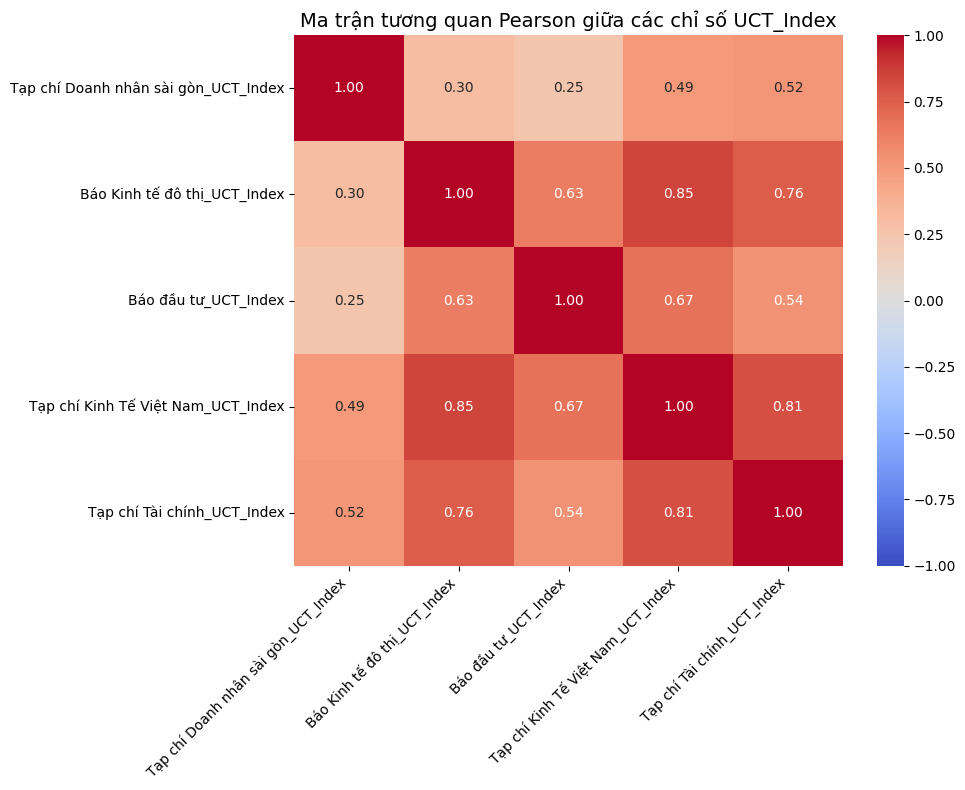

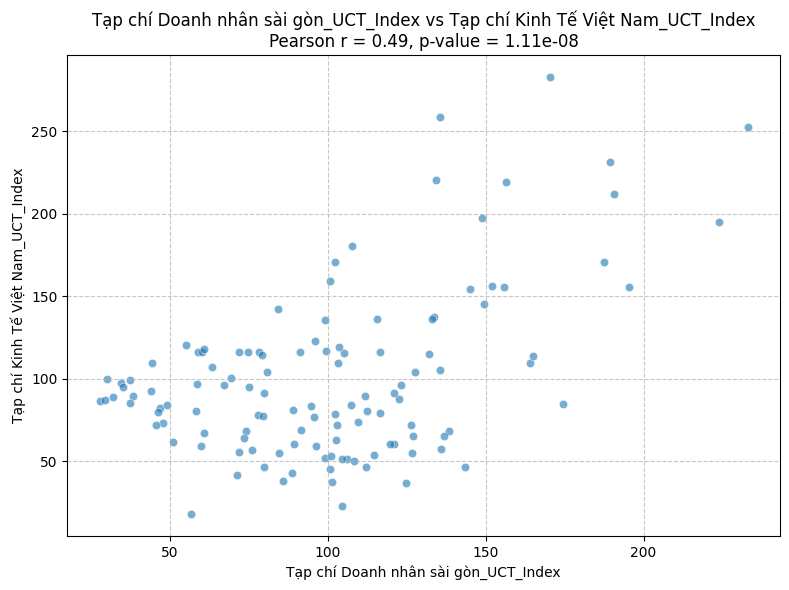

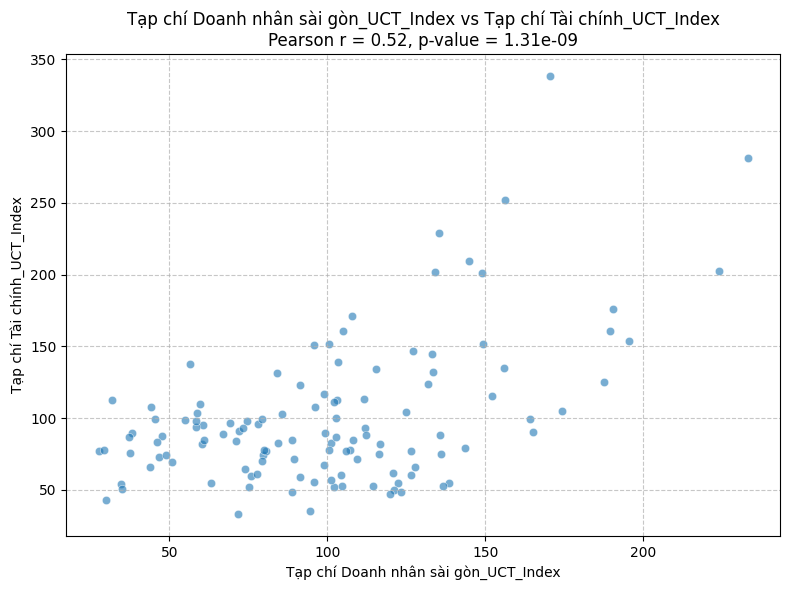

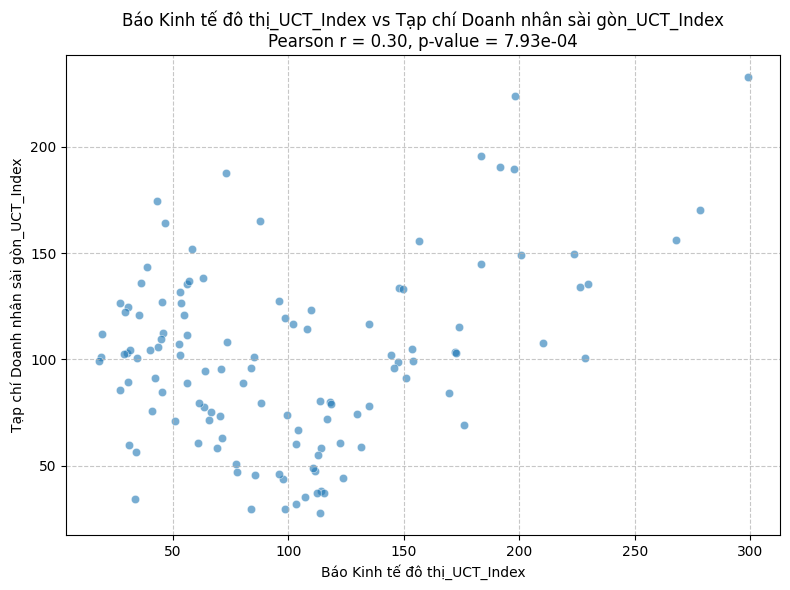

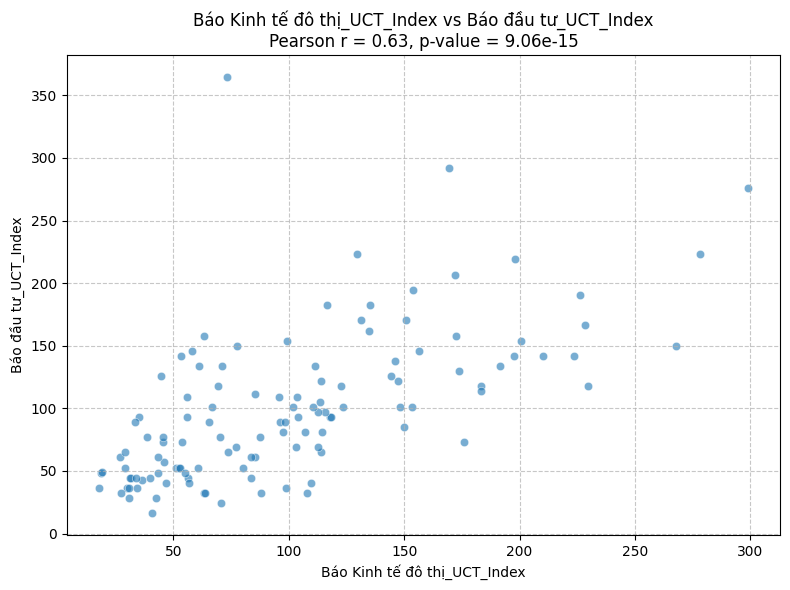

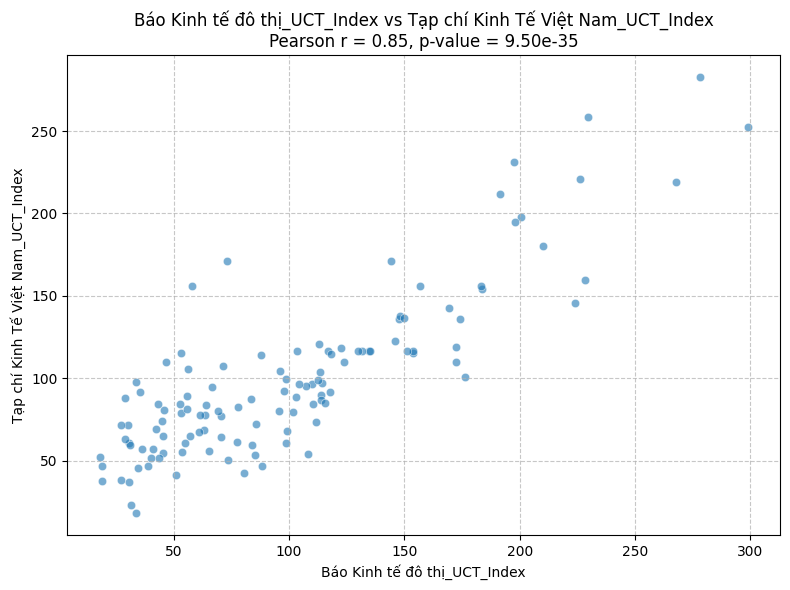

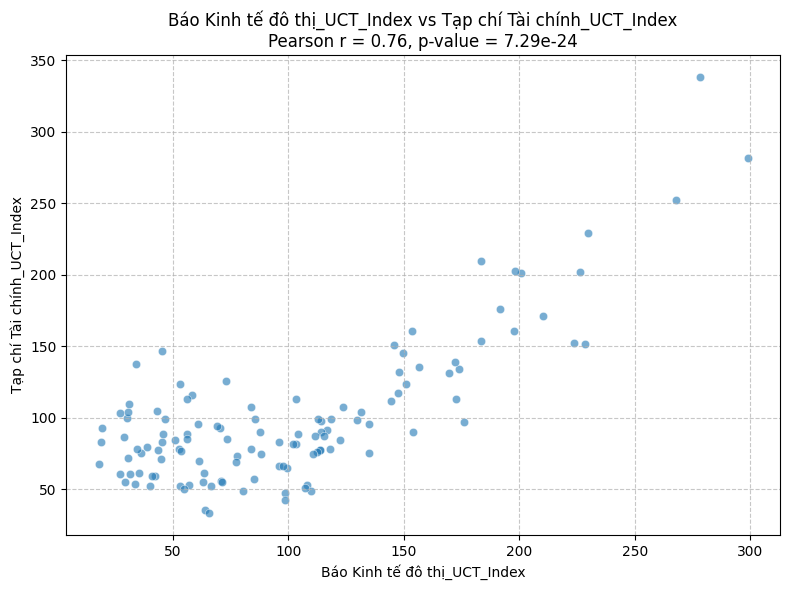

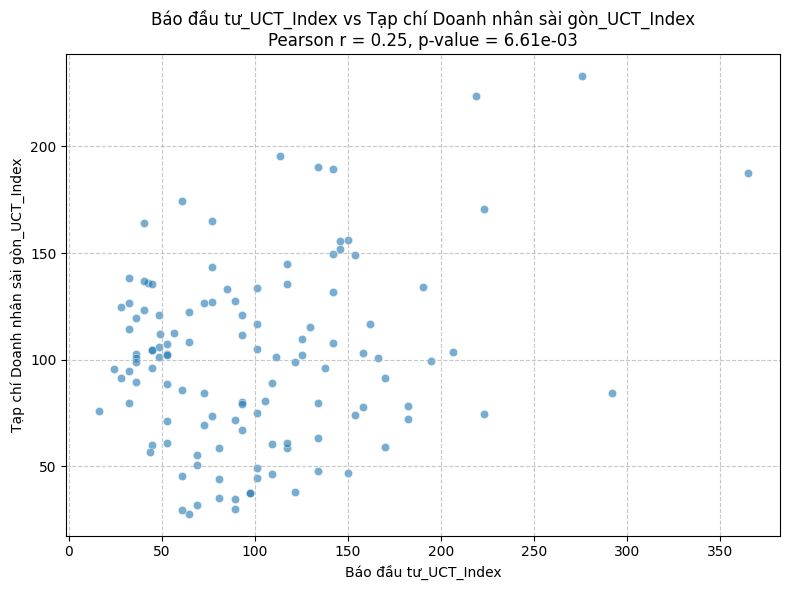

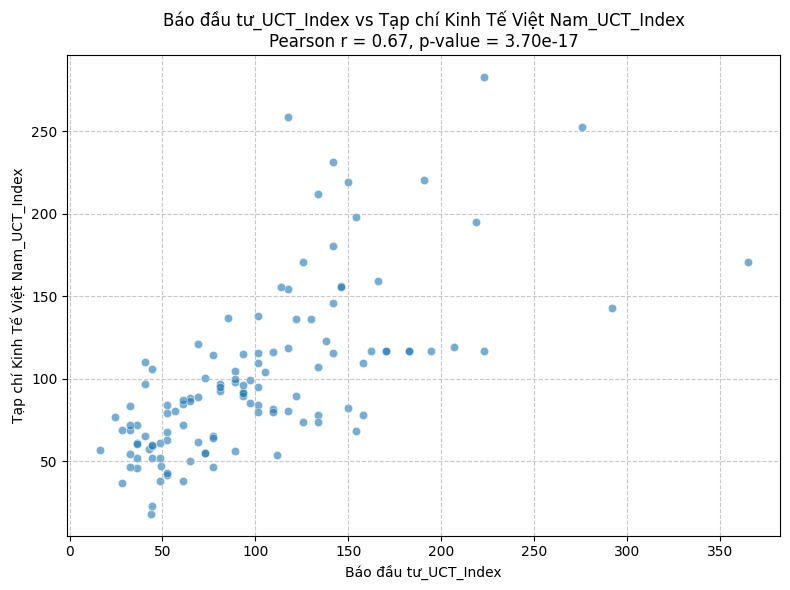

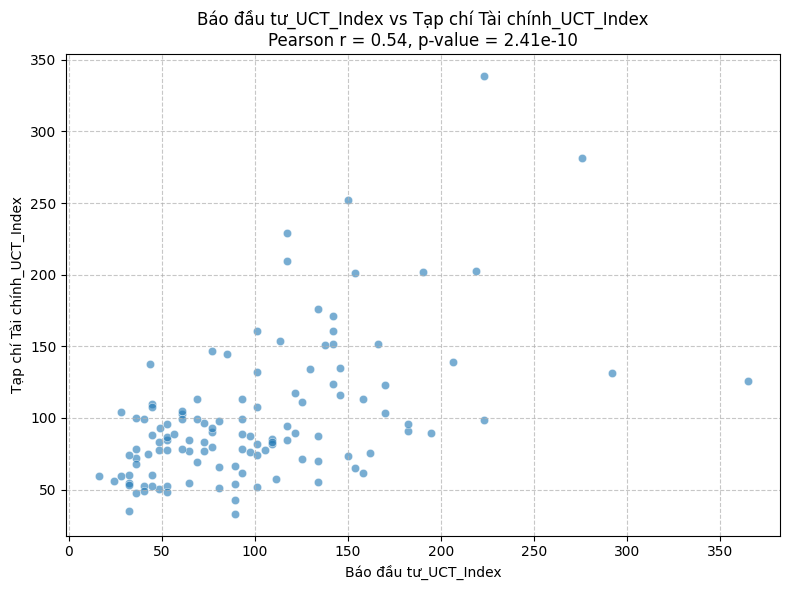

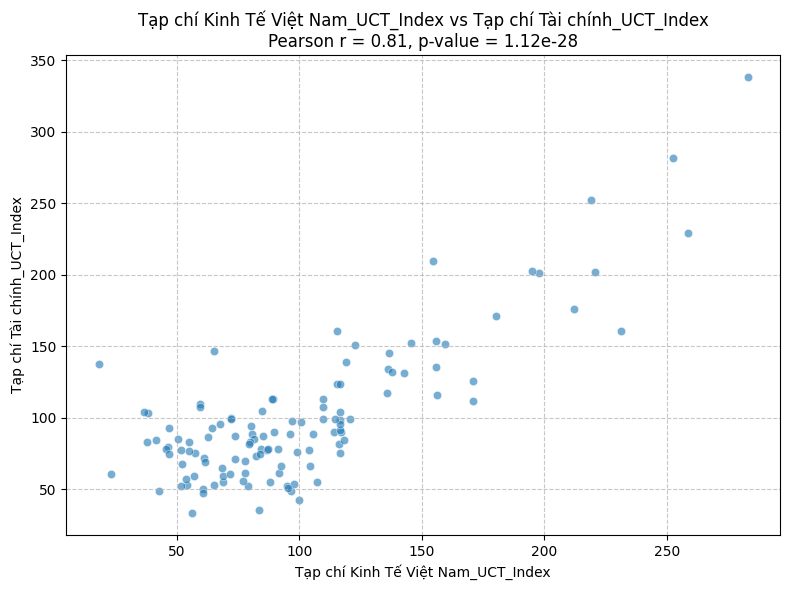

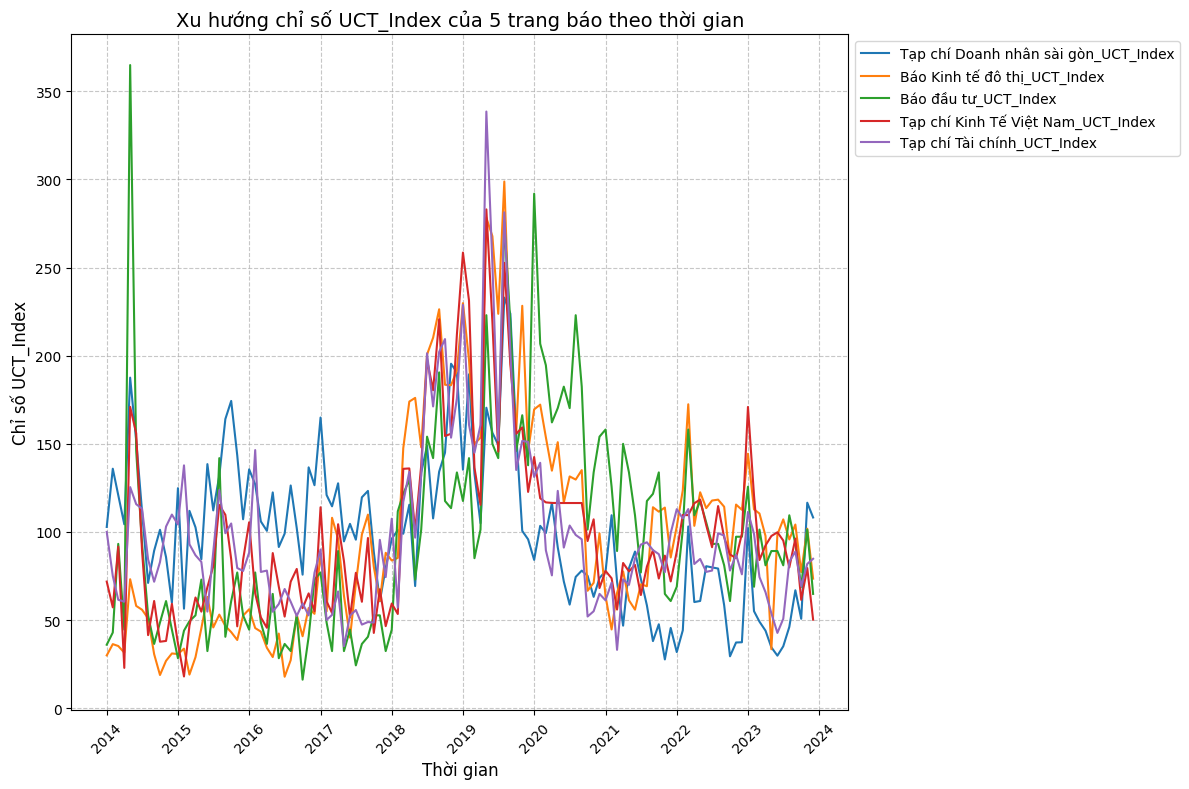

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Đọc dữ liệu từ file CSV (giả sử dữ liệu đã lưu thành 'uct_data.csv')
file_path = 'UCTV 2014-2023 mới.xlsx'  # Thay đổi đường dẫn đến file thực tế của bạn
df = pd.read_excel(file_path, sheet_name=1)

# 2. Lọc các cột UCT_Index và cột thời gian
uct_columns = [
    'Tạp chí Doanh nhân sài gòn_UCT_Index',
    'Báo Kinh tế đô thị_UCT_Index',
    'Báo đầu tư_UCT_Index',
    'Tạp chí Kinh Tế Việt Nam_UCT_Index',
    'Tạp chí Tài chính_UCT_Index'
]
uct_data = df[['month'] + uct_columns]
uct_data['month'] = pd.to_datetime(uct_data['month'])  # Chuyển đổi cột tháng sang định dạng datetime

# 3. Tính hệ số tương quan Pearson và p-value
correlation_matrix = pd.DataFrame(index=uct_columns, columns=uct_columns)
p_value_matrix = pd.DataFrame(index=uct_columns, columns=uct_columns)

for col1 in uct_columns:
    for col2 in uct_columns:
        if col1 != col2:
            corr, p_val = pearsonr(uct_data[col1], uct_data[col2])
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = p_val
        else:
            correlation_matrix.loc[col1, col2] = 1.0
            p_value_matrix.loc[col1, col2] = 0.0

correlation_matrix = correlation_matrix.astype(float)
p_value_matrix = p_value_matrix.astype(float)

# 4. In kết quả
print("Ma trận hệ số tương quan Pearson:")
print(correlation_matrix)
print("\nMa trận p-value:")
print(p_value_matrix)

# 5. Tìm các cặp có tương quan ý nghĩa thống kê (p-value < 0.05)
significant_pairs = []
for col1 in uct_columns:
    for col2 in uct_columns:
        if col1 < col2:  # Tránh lặp lại cặp (A, B) và (B, A)
            p_val = p_value_matrix.loc[col1, col2]
            if p_val < 0.05:
                significant_pairs.append((col1, col2, correlation_matrix.loc[col1, col2], p_val))

print("\nCác cặp có tương quan ý nghĩa thống kê (p-value < 0.05):")
for pair in significant_pairs:
    print(f"Cặp: {pair[0]} - {pair[1]}, Pearson r = {pair[2]:.4f}, p-value = {pair[3]:.4e}")

# 6. Minh họa 1: Heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Ma trận tương quan Pearson giữa các chỉ số UCT_Index", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Minh họa 2: Biểu đồ phân tán (Scatter Plot) cho các cặp có tương quan ý nghĩa
for pair in significant_pairs:
    col1, col2, corr, p_val = pair
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=uct_data[col1], y=uct_data[col2], alpha=0.6)
    plt.title(f"{col1} vs {col2}\nPearson r = {corr:.2f}, p-value = {p_val:.2e}", fontsize=12)
    plt.xlabel(col1, fontsize=10)
    plt.ylabel(col2, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 8. Minh họa 3: Biểu đồ đường (Line Plot) so sánh xu hướng theo thời gian
plt.figure(figsize=(12, 8))
for col in uct_columns:
    plt.plot(uct_data['month'], uct_data[col], label=col, linewidth=1.5)
plt.title("Xu hướng chỉ số UCT_Index của 5 trang báo theo thời gian", fontsize=14)
plt.xlabel("Thời gian", fontsize=12)
plt.ylabel("Chỉ số UCT_Index", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Lưu kết quả (tùy chọn)
correlation_matrix.to_csv('correlation_matrix.csv')
p_value_matrix.to_csv('p_value_matrix.csv')

# THỐNG KÊ MÔ TẢ

In [ ]:
import pandas as pd

# Đọc sheet đầu tiên
file_path = 'UCTV 2014-2023 mới.xlsx'
sheet_name = pd.ExcelFile(file_path).sheet_names[1]  # Sheet đầu tiên
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Chọn các cột cần thống kê
target_columns = ['kinh tế đô thị_UCT_Index', 'báo đầu tư_UCT_Index',
                  'vneconomy_UCT_Index', 'tạp chí tài chính_UCT_Index',
                  'doanh nhân sài gòn_UCT_Index']
data = df[target_columns]

# Thống kê mô tả
desc = data.describe().T  #

# Đổi tên cột để dễ hiểu (nếu cần)
desc = desc.rename(columns={
    "count": "Số quan sát",
    "mean": "Trung bình",
    "std": "Độ lệch chuẩn",
    "min": "Giá trị nhỏ nhất",
    "25%": "Phân vị 25%",
    "50%": "Phân vị 50% (Median)",
    "75%": "Phân vị 75%",
    "max": "Giá trị lớn nhất"
})

# In kết quả
print("Thống kê mô tả cho 5 chỉ số UCT:")
print(desc.round(3))  # Làm tròn cho đẹp


Thống kê mô tả cho 5 chỉ số UCT:
                              Số quan sát  Trung bình  Độ lệch chuẩn  \
kinh tế đô thị_UCT_Index            120.0       100.0         61.219   
báo đầu tư_UCT_Index                120.0       100.0         59.798   
vneconomy_UCT_Index                 120.0       100.0         50.260   
tạp chí tài chính_UCT_Index         120.0       100.0         49.728   
doanh nhân sài gòn_UCT_Index        120.0       100.0         42.261   

                              Giá trị nhỏ nhất  Phân vị 25%  \
kinh tế đô thị_UCT_Index                17.879       52.959   
báo đầu tư_UCT_Index                    16.216       52.701   
vneconomy_UCT_Index                     18.034       64.924   
tạp chí tài chính_UCT_Index             33.126       69.799   
doanh nhân sài gòn_UCT_Index            27.682       71.568   

                              Phân vị 50% (Median)  Phân vị 75%  \
kinh tế đô thị_UCT_Index                    87.902      132.320   
báo đầu tư_UCT_Index 